# Python Workshop: OpenCV
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/p_01_basic_CV_and_python/5_OpenCV_tutorial.ipynb)
<hr>

Based on:

http://www.dmi.unict.it/~furnari/teaching/CV1617/lab0/

<hr>
## Introduction
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.
[https://opencv.org/about/]

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/OpenCV_Logo_with_text_svg_version.svg" alt="opencv logo" width="300"/>

## Basic usage


In [1]:
import matplotlib.pyplot as plt
import cv2 # opencv for python package

fig_size = (10, 10)


In [2]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    ! apt-get install subversion
    ! svn export https://github.com/YoniChechik/AI_is_Math/trunk/p_01_basic_CV_and_python/Lenna.png
    ! svn export https://github.com/YoniChechik/AI_is_Math/trunk/p_01_basic_CV_and_python/opencv_logo.png

# to run interactively with vscode
import os
if os.getcwd().endswith("AI_is_Math"):
    os.chdir("p_01_basic_CV_and_python")




This is how to read and plot an image with opencv



In [3]:
img = cv2.imread("Lenna.png")



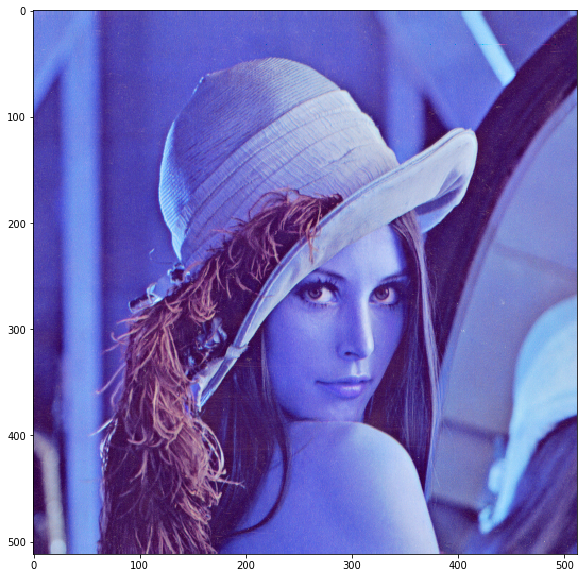

In [4]:
plt.figure(figsize=fig_size)
plt.imshow(img)



We got a weird image colors... This is because OpenCV uses image reading convention of BGR and matplotlib uses RGB. 

The fix is easy:




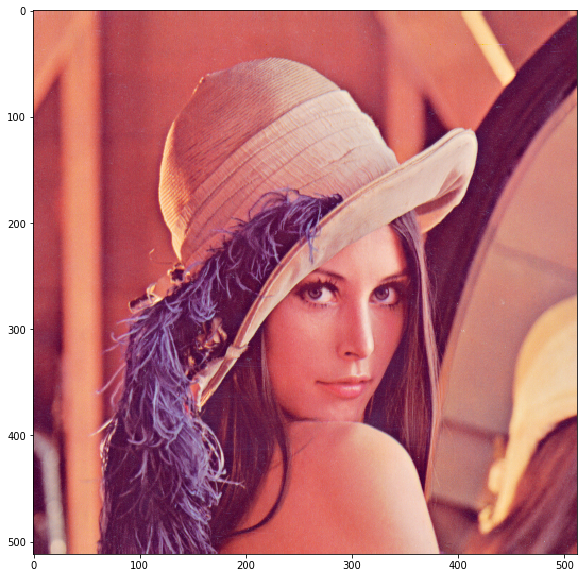

In [5]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=fig_size)
plt.imshow(img)




In [6]:
#some image info:
print(type(img))
print(img.shape)
img




<class 'numpy.ndarray'>
(512, 512, 3)


array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

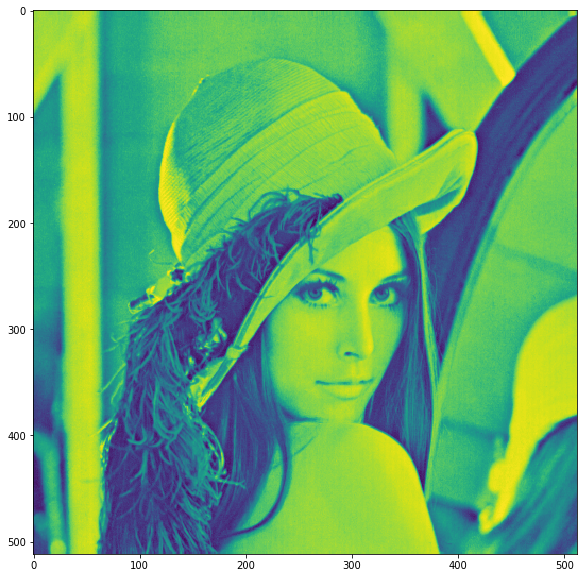

In [7]:
# show only red channel
plt.figure(figsize=fig_size)
plt.imshow(img[:,:,0]) 




Text(0.5, 1.0, 'Absolute pixel\n scale intensity')

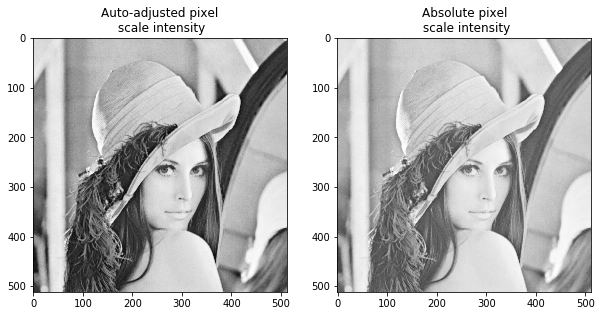

In [8]:
# gray color-mapping
fig, ax_arr = plt.subplots(1,2,figsize=fig_size)

ax_arr[0].imshow(img[:,:,0], cmap='gray')
ax_arr[0].set_title('Auto-adjusted pixel\n scale intensity')

ax_arr[1].imshow(img[:,:,0], cmap='gray', vmin=0, vmax=255) # 255 is the max of uint8 type number (== 2**8 -1)
ax_arr[1].set_title('Absolute pixel\n scale intensity')



## More advanced functions



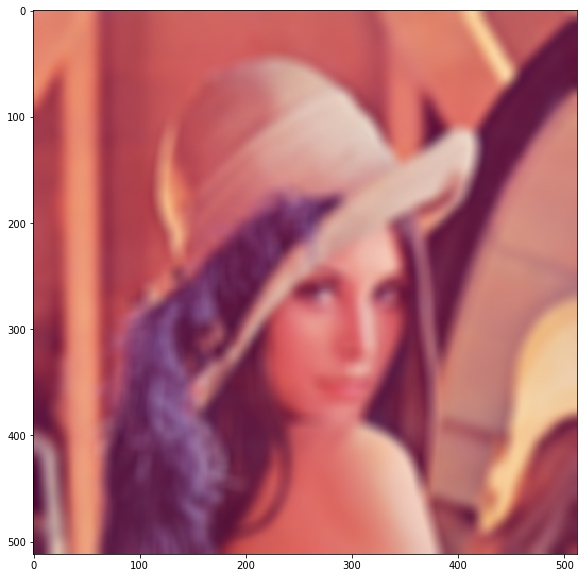

In [9]:
# image blurring
img_blurred=cv2.GaussianBlur(img,(15,15),7) #use a 15x15 Gaussian kernel with standard deviation 7
plt.figure(figsize=fig_size)
plt.imshow(img_blurred)




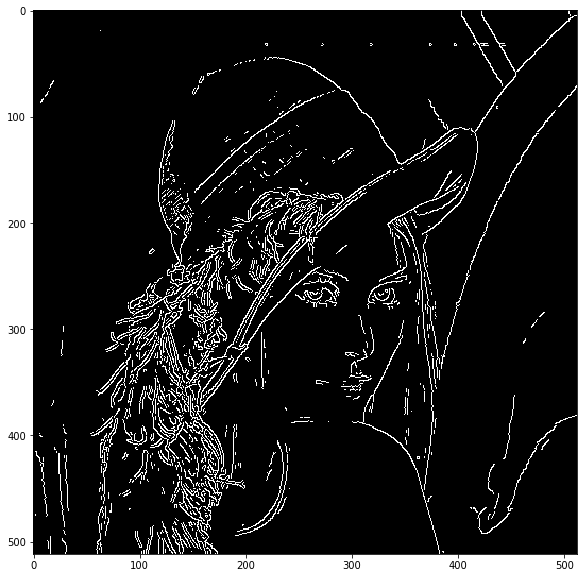

In [10]:
# edge detection
img_canny = cv2.Canny(img,180,200) # end args are the lower & upper TH of hysteresis
plt.figure(figsize=fig_size)
plt.imshow(img_canny,cmap='gray')




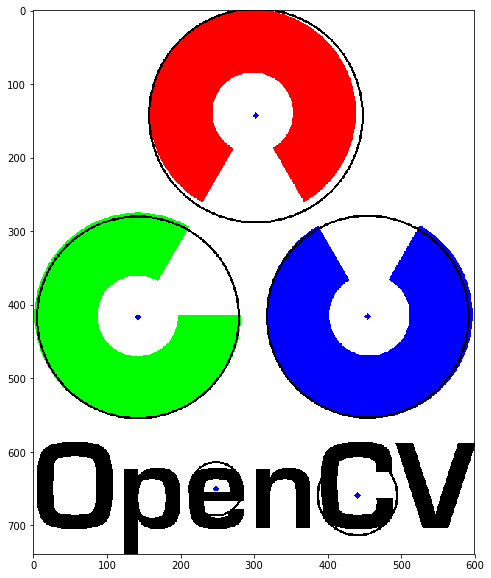

In [11]:
# detect circles

img = cv2.imread("opencv_logo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img_gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(img_gray,cv2.HOUGH_GRADIENT,0.1,50,
                            param1=50,param2=38)

for x,y,r in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(x,y),r,(0,0,0),2)
    # draw the center of the circle
    cv2.circle(img,(x,y),2,(0,0,255),3)

plt.figure(figsize=fig_size)
plt.imshow(img)


